In [1]:
 # Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
#reading whale returns
whale_data=Path('whale_returns.csv')
whale_df=pd.read_csv(whale_data,index_col='Date',parse_dates=True,infer_datetime_format=True)
whale_df.head()


C:\Users\awhun\AppData\Local\Temp\ipykernel_1508\2637949160.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df=pd.read_csv(whale_data,index_col='Date',parse_dates=True,infer_datetime_format=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
whale_df=whale_df.sort_index()
#count nulls
whale_df.isnull().sum()
#drop nulls
whale_df.dropna(inplace=True)

In [4]:
#reading algorithmic returns
algo_data=Path('algo_returns.csv')
algo_df=pd.read_csv(algo_data,index_col='Date',parse_dates=True,infer_datetime_format=True)
algo_df.head()


C:\Users\awhun\AppData\Local\Temp\ipykernel_1508\4054653750.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df=pd.read_csv(algo_data,index_col='Date',parse_dates=True,infer_datetime_format=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [5]:
algo_df=algo_df.sort_index()
#count nulls
algo_df.isnull().sum()
#drop nulls
algo_df.dropna(inplace=True)

In [6]:
#reading S&P 500 closing prices
sp500=Path('sp500_history.csv')
sp500_df=pd.read_csv(sp500, index_col='Date',parse_dates=True,infer_datetime_format=True)
#check data types
sp500_df.dtypes
sp500_df.head()


C:\Users\awhun\AppData\Local\Temp\ipykernel_1508\2845127104.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df=pd.read_csv(sp500, index_col='Date',parse_dates=True,infer_datetime_format=True)
C:\Users\awhun\AppData\Local\Temp\ipykernel_1508\2845127104.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df=pd.read_csv(sp500, index_col='Date',parse_dates=True,infer_datetime_format=True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [7]:
#fix data types
#Removing $ and , to later make column in float format
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].str.replace(",", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [8]:
#calculate daily returns
sp500_daily_returns=sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [9]:
#drop nulls
sp500_daily_returns.dropna().copy()
sp500_daily_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [10]:
#rename 'Close' column to be specific to this portfolio
sp500_daily_returns=sp500_daily_returns.rename(columns={'Close':'Final Count'})
sp500_daily_returns

,Final Count
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [11]:
 # Join Whale Returns, Algorithmic Returns, and 
#the S&P 500 Returns into a single DataFrame with 
#columns for each portfolio's returns.

combined_df=pd.concat([whale_df,algo_df,sp500_daily_returns],axis='columns',join='inner')
combined_df.columns=['Soros','Paulson','Tiger Global','Berkshire','Algo1','Algo2','SP500']
combined_df.dropna()
combined_df

,Soros,Paulson,Tiger Global,Berkshire,Algo1,Algo2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


<Axes: xlabel='Date'>

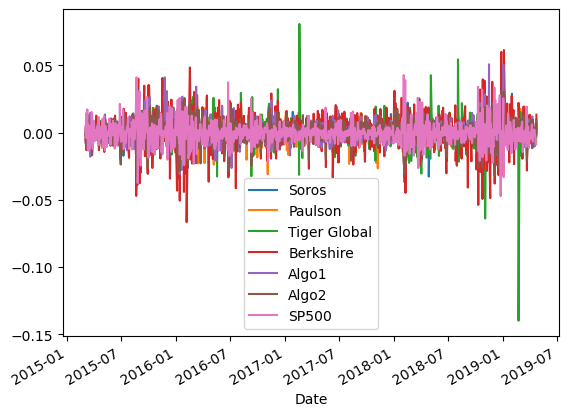

In [12]:
 # Plot daily returns of all portfolios

combined_df.plot()

<Axes: xlabel='Date'>

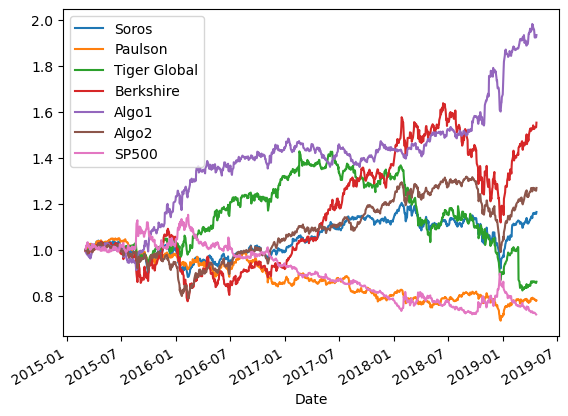

In [13]:
# Calculate cumulative returns of all portfolios
cumulative_returns=(1+combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

<Axes: >

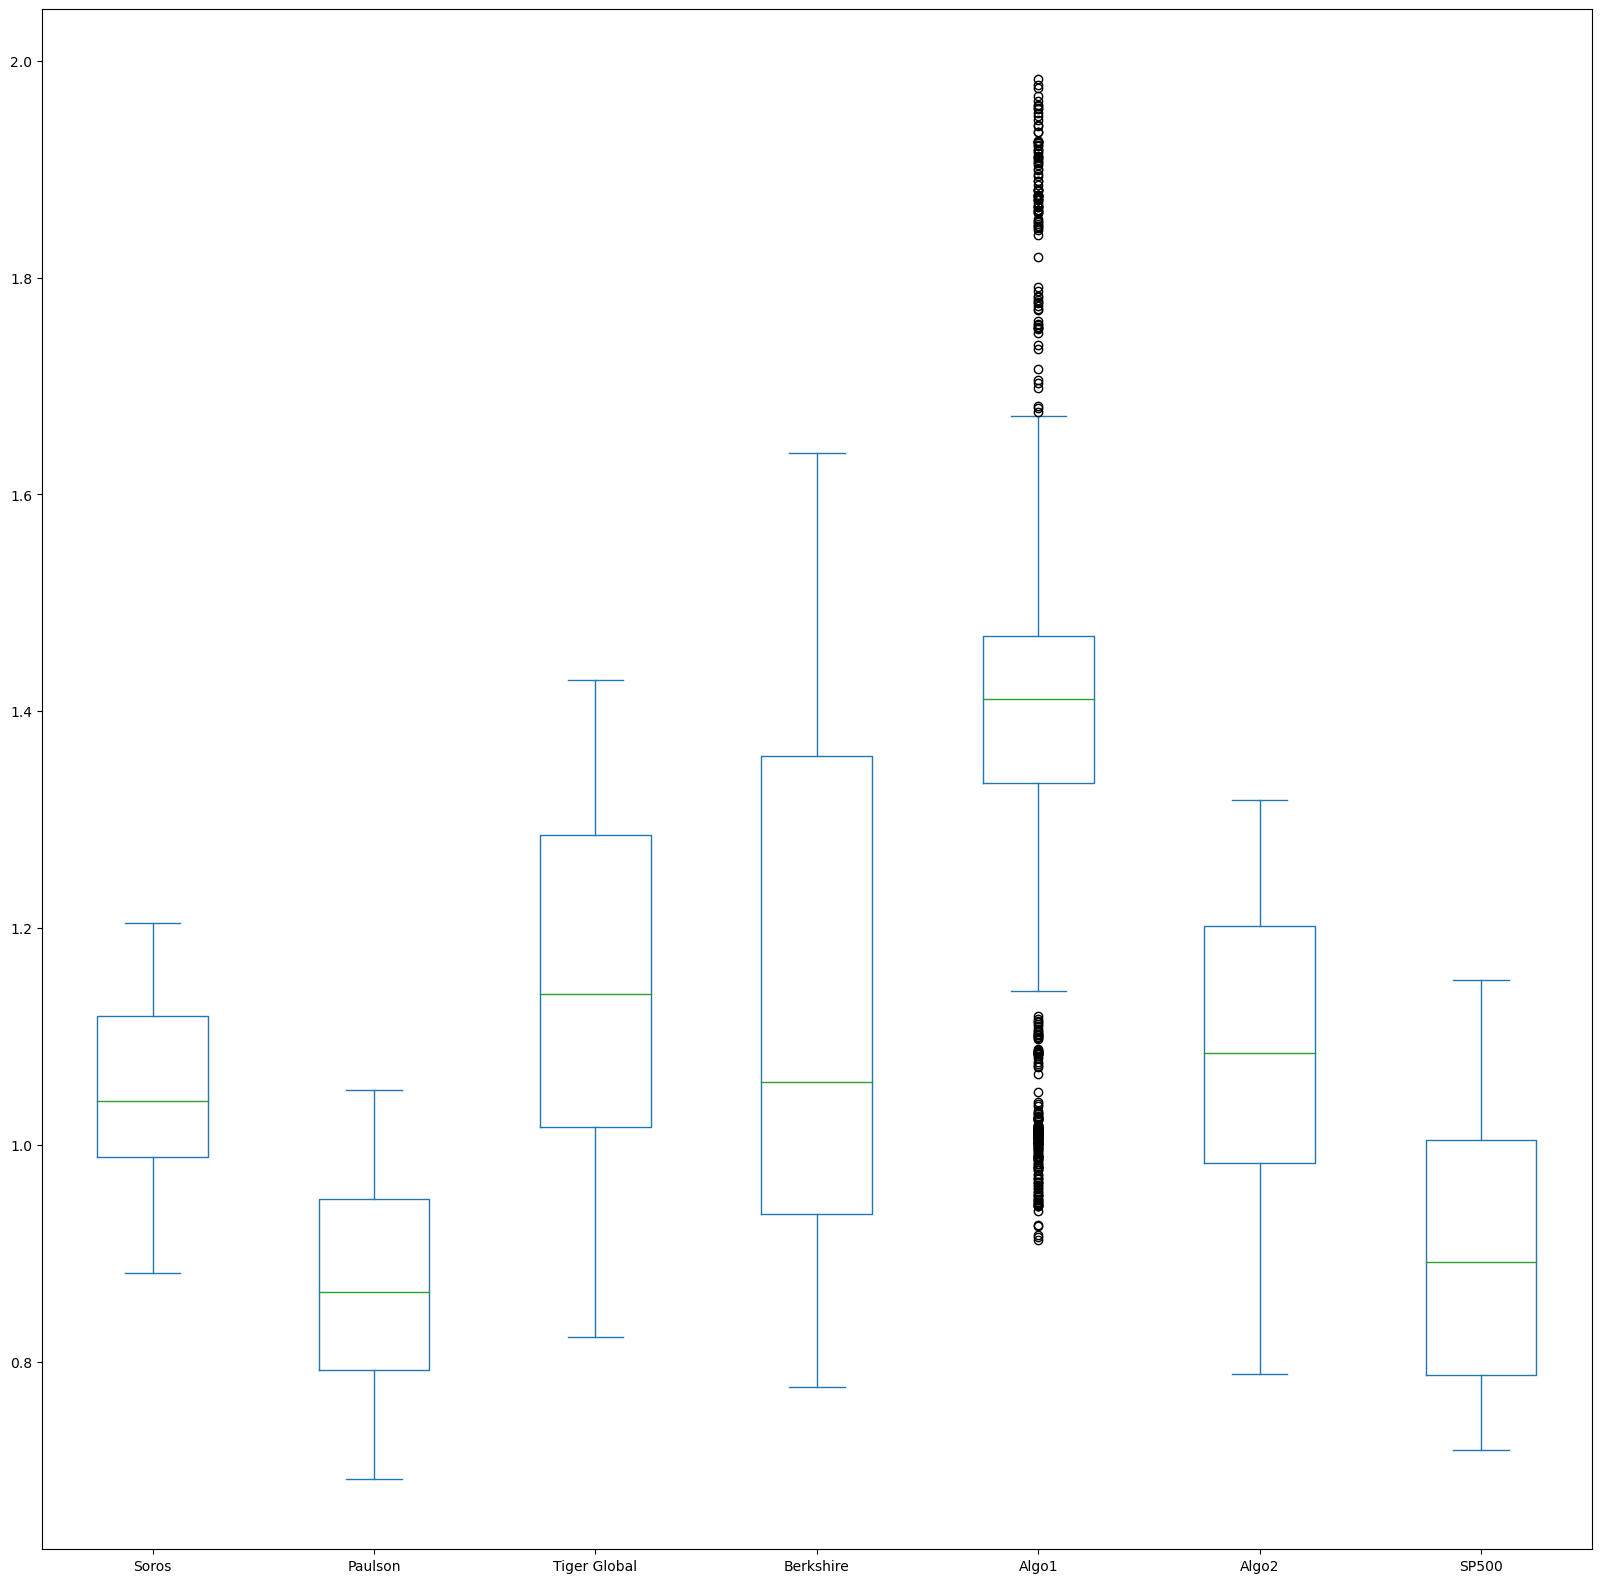

In [14]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize=(20,20))

In [15]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

Soros           0.007895
Paulson         0.007023
Tiger Global    0.010894
Berkshire       0.012919
Algo1           0.007620
Algo2           0.008342
SP500           0.008587
dtype: float64

In [16]:
# Calculate  the daily standard deviation of S&P 500
sp500_risk=combined_df["SP500"].std()
sp500_risk

0.00858688974707399

In [17]:
# Determine which portfolios are riskier than the S&P 500

#This is not code, just stating the portfolios
Portfolios riskier than SP500 are Tiger Global and Berkshire

SyntaxError: invalid syntax (26297941.py, line 4)

In [18]:
# Calculate the annualized standard deviation (252 trading days)
combined_df.std()*np.sqrt(252)

Soros           0.125335
Paulson         0.111488
Tiger Global    0.172936
Berkshire       0.205077
Algo1           0.120967
Algo2           0.132430
SP500           0.136313
dtype: float64

<Axes: xlabel='Date'>

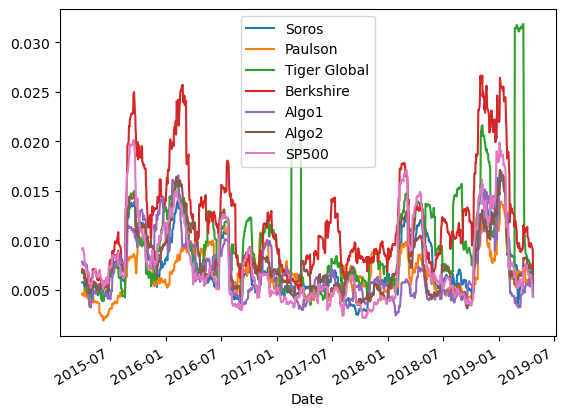

In [19]:

# Calculate the rolling standard deviation for all portfolios using a 21-day window


rolling_df=combined_df.rolling(window=21).std()


# Plot the rolling standard deviation
rolling_df.plot()

In [20]:
# Calculate the correlation
correlation=combined_df.corr()
# Display the correlation matrix
correlation

,Soros,Paulson,Tiger Global,Berkshire,Algo1,Algo2,SP500
Soros,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574
Paulson,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549
Tiger Global,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505
Berkshire,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856
Algo1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.033963
Algo2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<Axes: xlabel='Date'>

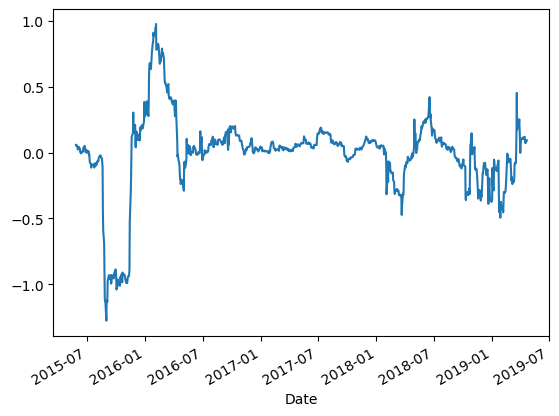

In [21]:
 # Calculate covariance of a single portfolio

#Parentheses required an integer
covariance=combined_df['Berkshire'].rolling(window=60).cov(combined_df['SP500'])
# Calculate variance of S&P 500
sp500variance=combined_df['SP500'].var()
# Computing beta
soros_beta=covariance/sp500variance
# Plot beta trend
soros_beta.plot()

<Axes: title={'center': 'EWM'}, xlabel='Date'>

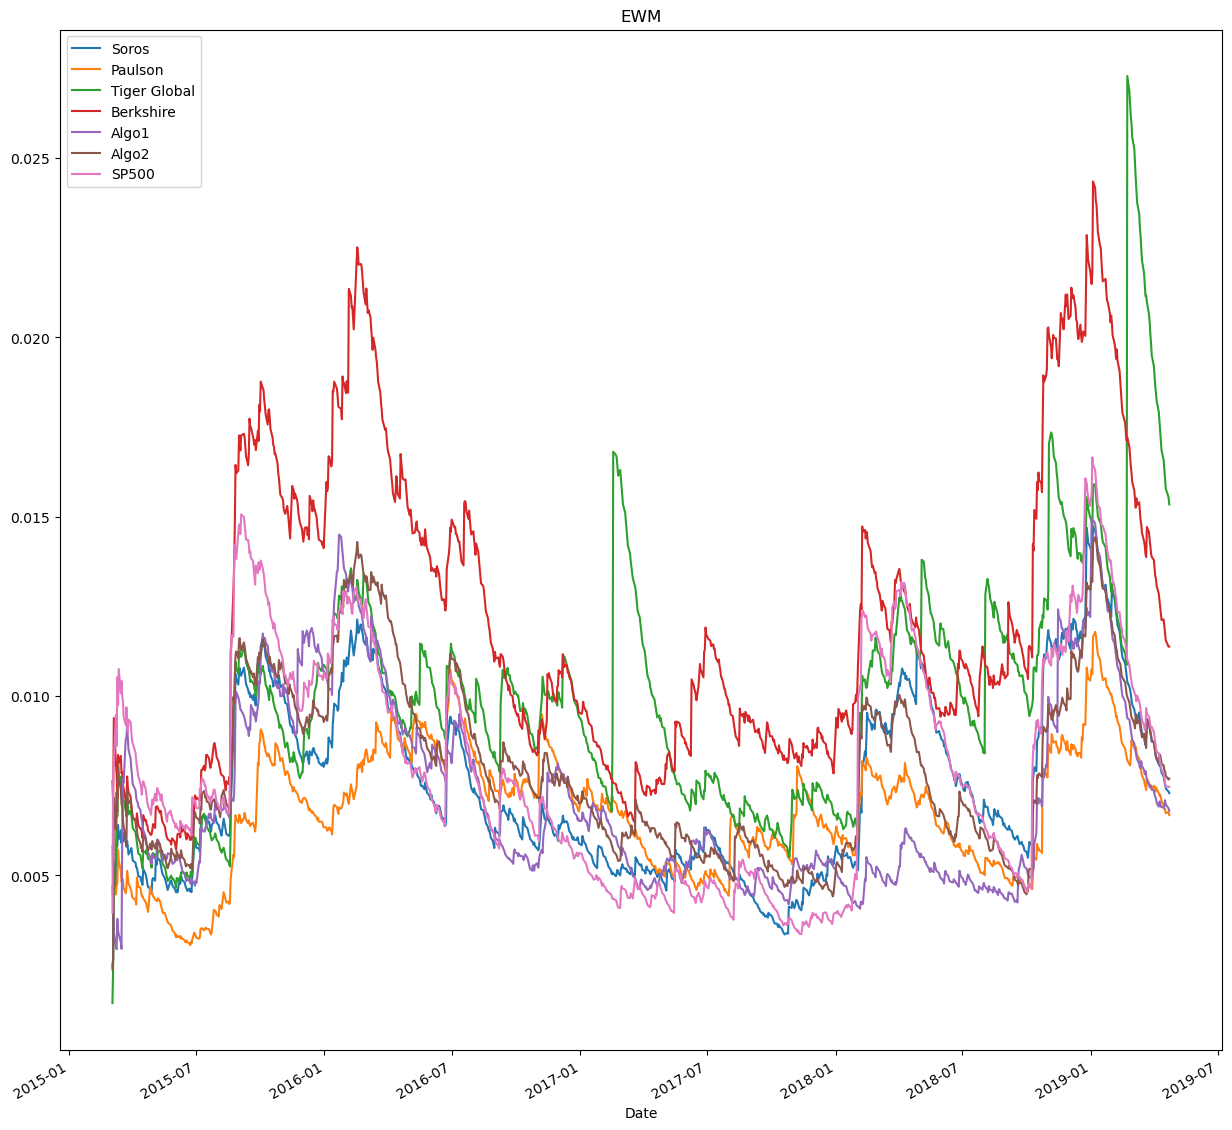

In [22]:
# Use `ewm` to calculate the rolling window
rolling_window=combined_df.ewm(halflife=21).std().plot(figsize=(15,15), title='EWM')
rolling_window

<Axes: title={'center': 'Sharpe Ratio'}>

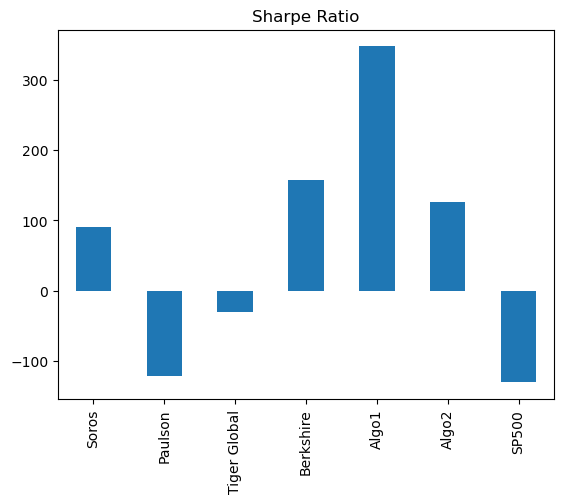

In [23]:
# Annualized Sharpe Ratio
sharpe_ratio=(combined_df.mean()*252/combined_df.std()*np.sqrt(252))
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar',title='Sharpe Ratio')

In [24]:
 # Reading data from 1st stock
apple=Path('aapl_historical.csv')
apple_df=pd.read_csv(apple, index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)
apple_df.head()


C:\Users\awhun\AppData\Local\Temp\ipykernel_1508\2184944056.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  apple_df=pd.read_csv(apple, index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [25]:
  # Reading data from 2nd stock
costco=Path('cost_historical.csv')
costco_df=pd.read_csv(costco, index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)
costco_df.head()


C:\Users\awhun\AppData\Local\Temp\ipykernel_1508\2041754795.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  costco_df=pd.read_csv(costco, index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [43]:
  # Reading data from 3rd stock
google=Path('goog_historical.csv')
google_df=pd.read_csv(google, index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)
google_df.head()


C:\Users\awhun\AppData\Local\Temp\ipykernel_1508\4241000056.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  google_df=pd.read_csv(google, index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [56]:
# Combine all stocks in a single DataFrame
portfolio_returns=pd.concat([apple_df,costco_df,google_df],axis='rows',join='inner')

  # Reset Date index
all_portfolios=portfolio_returns.reset_index('Trade DATE')
    
all_portfolios.head()

,Trade DATE,Symbol,NOCP
0,2019-05-09,AAPL,200.72
1,2019-05-08,AAPL,202.90
2,2019-05-07,AAPL,202.86
3,2019-05-06,AAPL,208.48
4,2019-05-03,AAPL,211.75


In [57]:
  # Reorganize portfolio data by having a column per symbol
all_portfolios=all_portfolios.pivot_table(values="NOCP",index="Trade DATE",columns="Symbol")


In [58]:
  # Calculate daily returns
all_portfolios=all_portfolios.pct_change()

In [59]:
# Drop NAs
all_portfolios.dropna().copy()
# Display sample data
all_portfolios.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [60]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
all_portfolios=all_portfolios.dot(weights)
# Display sample data
all_portfolios.head()

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
dtype: float64

In [71]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios=portfolio_returns
#Chose apple, but['AAPL'] part in command reported error, so keeping as is due to time
all_portfolios.tail()


,Symbol,NOCP
Trade DATE,,
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23
2018-05-14,GOOG,1100.20
2018-05-11,GOOG,1098.26


In [72]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios=all_portfolios.dropna().copy()
all_portfolios.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [73]:
#Reconverting dataframe for calculations
all_portfolios=portfolio_returns.pivot_table(values="NOCP",index="Trade DATE",columns="Symbol")

In [74]:
# Calculate the annualized `std'
all_portfolios.std()

Symbol
AAPL    21.436472
COST    14.434399
GOOG    67.846776
dtype: float64

<Axes: xlabel='Trade DATE'>

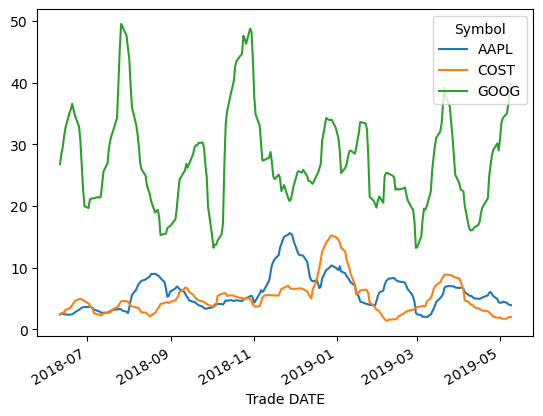

In [75]:
 # Calculate rolling standard deviation
rolling_std=all_portfolios.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot()

<Axes: xlabel='Symbol'>

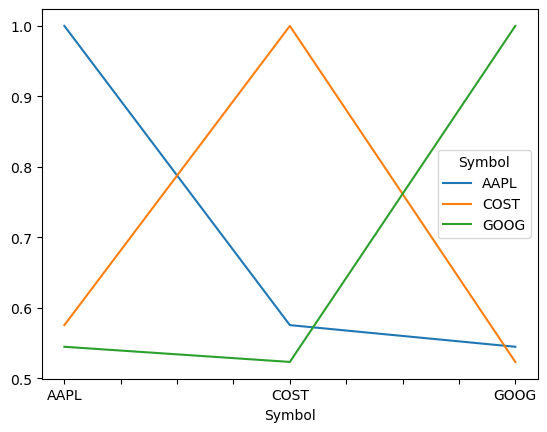

In [76]:
# Calculate and plot the correlation
NOCP_correlation=all_portfolios.corr()
NOCP_correlation.plot()

<Axes: xlabel='Trade DATE'>

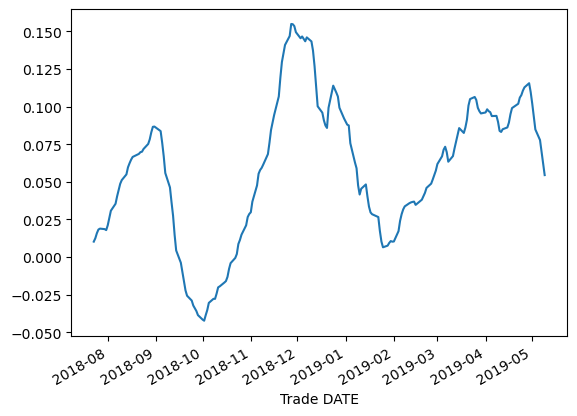

In [81]:
# Calculate and plot Beta
covariance=all_portfolios['AAPL'].rolling(window=50).cov(all_portfolios['GOOG'])
variance=all_portfolios['GOOG'].var()
beta=covariance/variance
beta.plot()

<Axes: title={'center': 'Sharpe Ratio'}, xlabel='Symbol'>

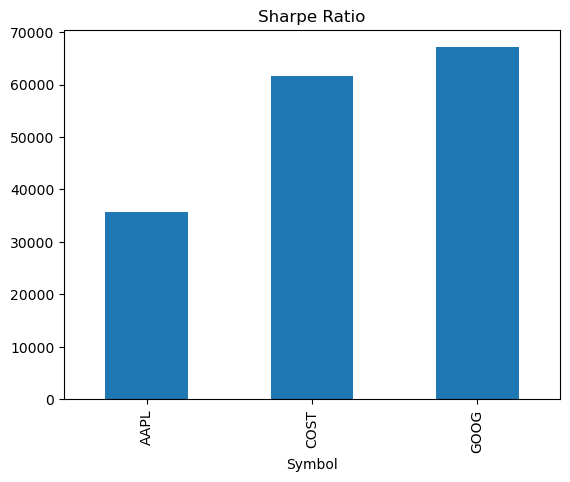

In [82]:
 # Calculate Annualized Sharpe Ratios
sharpe_ratio=(all_portfolios.mean()*252/all_portfolios.std()*np.sqrt(252))
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar',title='Sharpe Ratio')

In [85]:
print(f"How does your portfolio do?")
print(f"I ended up choosing Apple which had the lowest sharp ratio.") 
print(f"So doesn't make much profit but also less likely to lose money.")

How does your portfolio do?
I ended up choosing Apple which had the lowest sharp ratio.
So doesn't make much profit but also less likely to lose money.
